In [1]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# show the image
ori_img = cv2.imread('together.jpg')
cv2.imshow('img', ori_img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [3]:
# first alternation is to randomly change the color. We can change the value per channel.
def change_color_random(img):
    random_values = np.random.randint(-50, 50, size=(3,))
    color_changed = img + random_values
    return np.clip(color_changed, 0, 255).astype('uint8')

cv2.imshow('img', change_color_random(ori_img))
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [4]:
# read in grey img
grey = cv2.imread('together.jpg', 0)
cv2.imshow('img', grey)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [5]:
# histogram equalization on grey img
hist_equled = cv2.equalizeHist(grey)
cv2.imshow('img', hist_equled)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [6]:
# what if we do this on each channel of a colored image?
bgr = cv2.split(ori_img)
equaled_bgr = [cv2.equalizeHist(ch) for ch in bgr]
equled_color_img = cv2.merge(equaled_bgr)
cv2.imshow('img', equled_color_img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

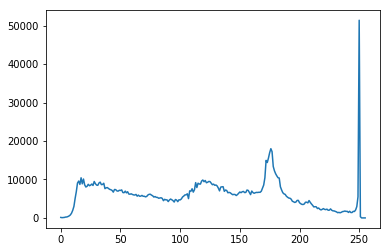

In [7]:
# show the histogram of a grey img
hist,bins = np.histogram(grey.ravel(),256,[0,256]) # note .ravel() is a view of the original data. .flatten() makes a copy 
plt.plot(hist)
plt.show()

In [8]:
# gamma correction. Because we want to strech the low value part of the img, i.e. make the dark part brighter

def gamma2_correction_img(img):
    def gamma2_correction(value):
        return np.sqrt(value / 256) * 256
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gamma2_correction(gray).astype('uint8')

cv2.imshow('img', gamma2_correction_img(ori_img))
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [9]:
# affine translation
translation = np.float32([[0.5, -0.86, 100], [0.86, 0.5, 100.5]]) # the affine matrix with shape (2, 3) and type float
rows, cols = ori_img.shape[0], ori_img.shape[1]
transed = cv2.warpAffine(ori_img, translation, (cols, rows)) # mind the third arg

cv2.imshow('img', transed)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [10]:
# getRotaionMatrix
rows, cols = ori_img.shape[0], ori_img.shape[1]
rotMtrx = cv2.getRotationMatrix2D((0, 0), 0, 1) # third arg is scale, so you scale using rotate function, it is a bit weird

roted = cv2.warpAffine(ori_img, rotMtrx, (cols, rows))

cv2.imshow('img', roted)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [11]:
# random rotation, scaling and translation combined for augmentation
def random_affine(img, angle=30, scale=0.3, translation_ratio=0.2):
    # use Gauss distribution, each parameter is the standard deviation
    rows, cols, chnls = img.shape
    angle = np.random.randn() * angle
    scale = np.exp(np.random.randn()*scale)
    trans_rows = rows * np.random.randn() * translation_ratio
    trans_cols = cols * np.random.randn() * translation_ratio
    trans_mtrx = np.float32([[0, 0, trans_cols], [0, 0, trans_rows]])
    cmbined_mtrx = cv2.getRotationMatrix2D((cols/2, rows/2), angle, scale) + trans_mtrx
    return cv2.warpAffine(img, cmbined_mtrx, (cols, rows))

cv2.imshow('img', random_affine(ori_img))
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

The basic operations are listed above. We want to have a function, that get a directory path of images and create another directory of augemented images. Now we have 3 functions, and 

In [12]:
def augmentation(path):
    path, _ = os.path.split(path)
    new_path = path + '_augment'
    if not os.path.isdir(new_path):
        os.mkdir(new_path)
    img_list = os.listdir(path)
    print(img_list)
    for i in img_list:
        if not i.endswith('.jpg'):
            continue
        name, ext = os.path.splitext(i)
        print(path+i)
        img = cv2.imread(path+'/'+i)
        cv2.imwrite(new_path+'/'+name+'_color'+ext, change_color_random(img))
        cv2.imwrite(new_path+'/'+name+'_gamma'+ext, gamma2_correction_img(img))
        cv2.imwrite(new_path+'/'+name+'_affine'+ext, random_affine(img))
        

In [13]:
augmentation('./img_folder/')

['.ipynb_checkpoints', 'together.jpg']
./img_foldertogether.jpg
